In [20]:
from qiskit import*
import qiskit
from qiskit.scheduler import measure
from qiskit.pulse.instructions import Play, Acquire
from qiskit import pulse
from qiskit.pulse import Drag, Gaussian, GaussianSquare


In [21]:
%matplotlib inline
import random
import math
import numpy as np
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import numpy as np

from qiskit.providers.aer.noise import NoiseModel
from qiskit.aqua import QuantumInstance
from qiskit.providers.aer.noise import thermal_relaxation_error, ReadoutError, depolarizing_error

provider = IBMQ.get_provider(hub='ibm-q-education', group = 'rutgers-uni-Schn', project= 'vqe-research')
machine = provider.get_backend('ibmq_casablanca')
# from qiskit.test.mock import FakeLondon
# machine = FakeLondon()
machine_noise_model = NoiseModel.from_backend(machine)
simulator = Aer.get_backend('qasm_simulator')


basis_gates = machine_noise_model.basis_gates

C:\Users\isido\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-11-10 05:34:48,081: Credentials are already in use. The existing account in the session will be replaced.


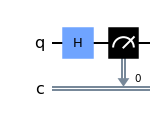

In [22]:
circ = QuantumCircuit(1,1)
circ.h(0)
# circ.cx(0,1)
circ.measure(0,0)
# circ.measure(1,1)
circ.draw(output = 'mpl')

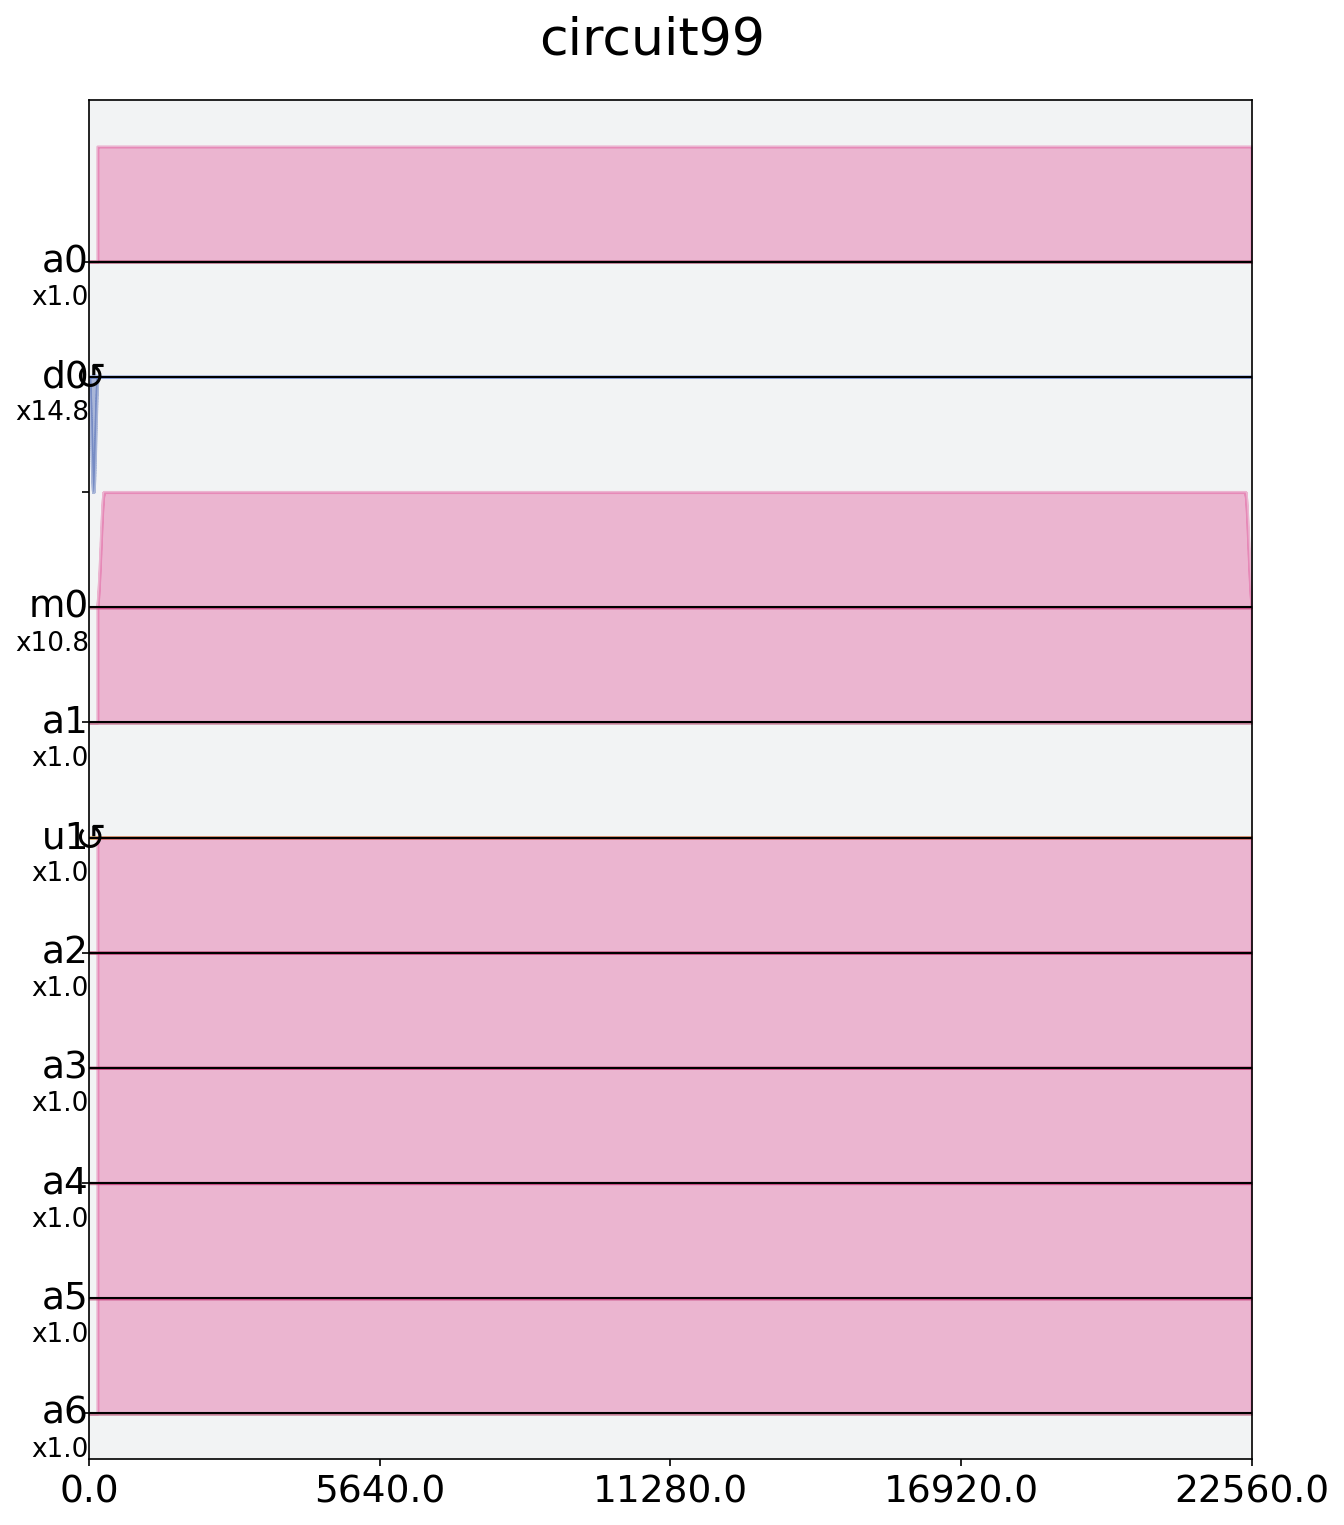

In [23]:
circ_device = transpile(circ, machine)
sched_circ = schedule(circ_device, machine)
sched_circ.draw()

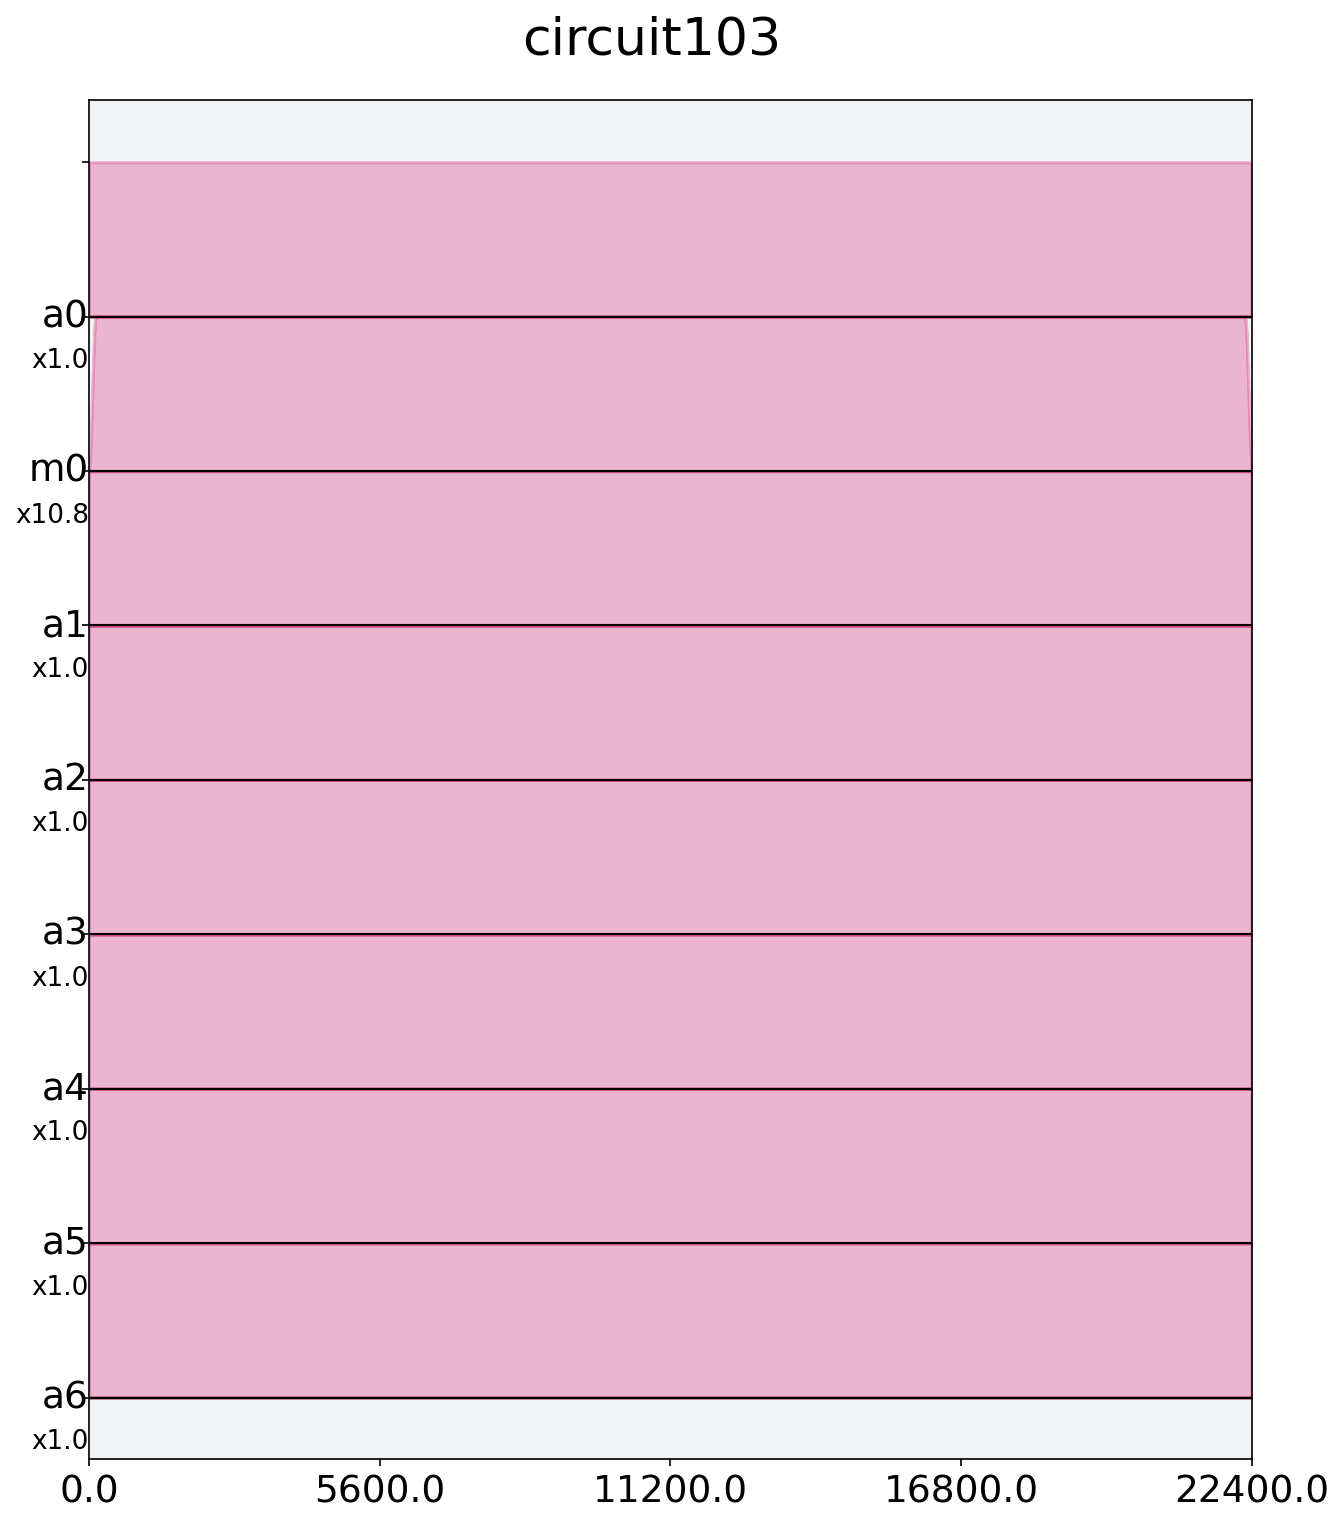

In [24]:
circ2 = QuantumCircuit(1,1)
circ2.h(0)
circ2.h(0)
circ2.h(0)
circ2.h(0)
# circ.cx(0,1)
circ2.measure(0,0)

circ_device2 = transpile(circ2, machine)
sched_circ2 = schedule(circ_device2, machine)
sched_circ2.draw()

In [25]:
experiments= [sched_circ, sched_circ2]

In [26]:
from qiskit.tools.monitor import job_monitor
job = execute(experiments, backend = machine, shots=8192)
job_monitor(job)
job.result()

KeyboardInterrupt: 

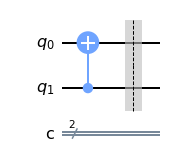

In [27]:
circ = QuantumCircuit(2,2)
#circ.x(1)
circ.cx(1,0)
circ.barrier(0,1)
# circ.cx(0,1)
# circ.barrier(0,1)
# circ.cx(0,1)
circ.draw(output = 'mpl')

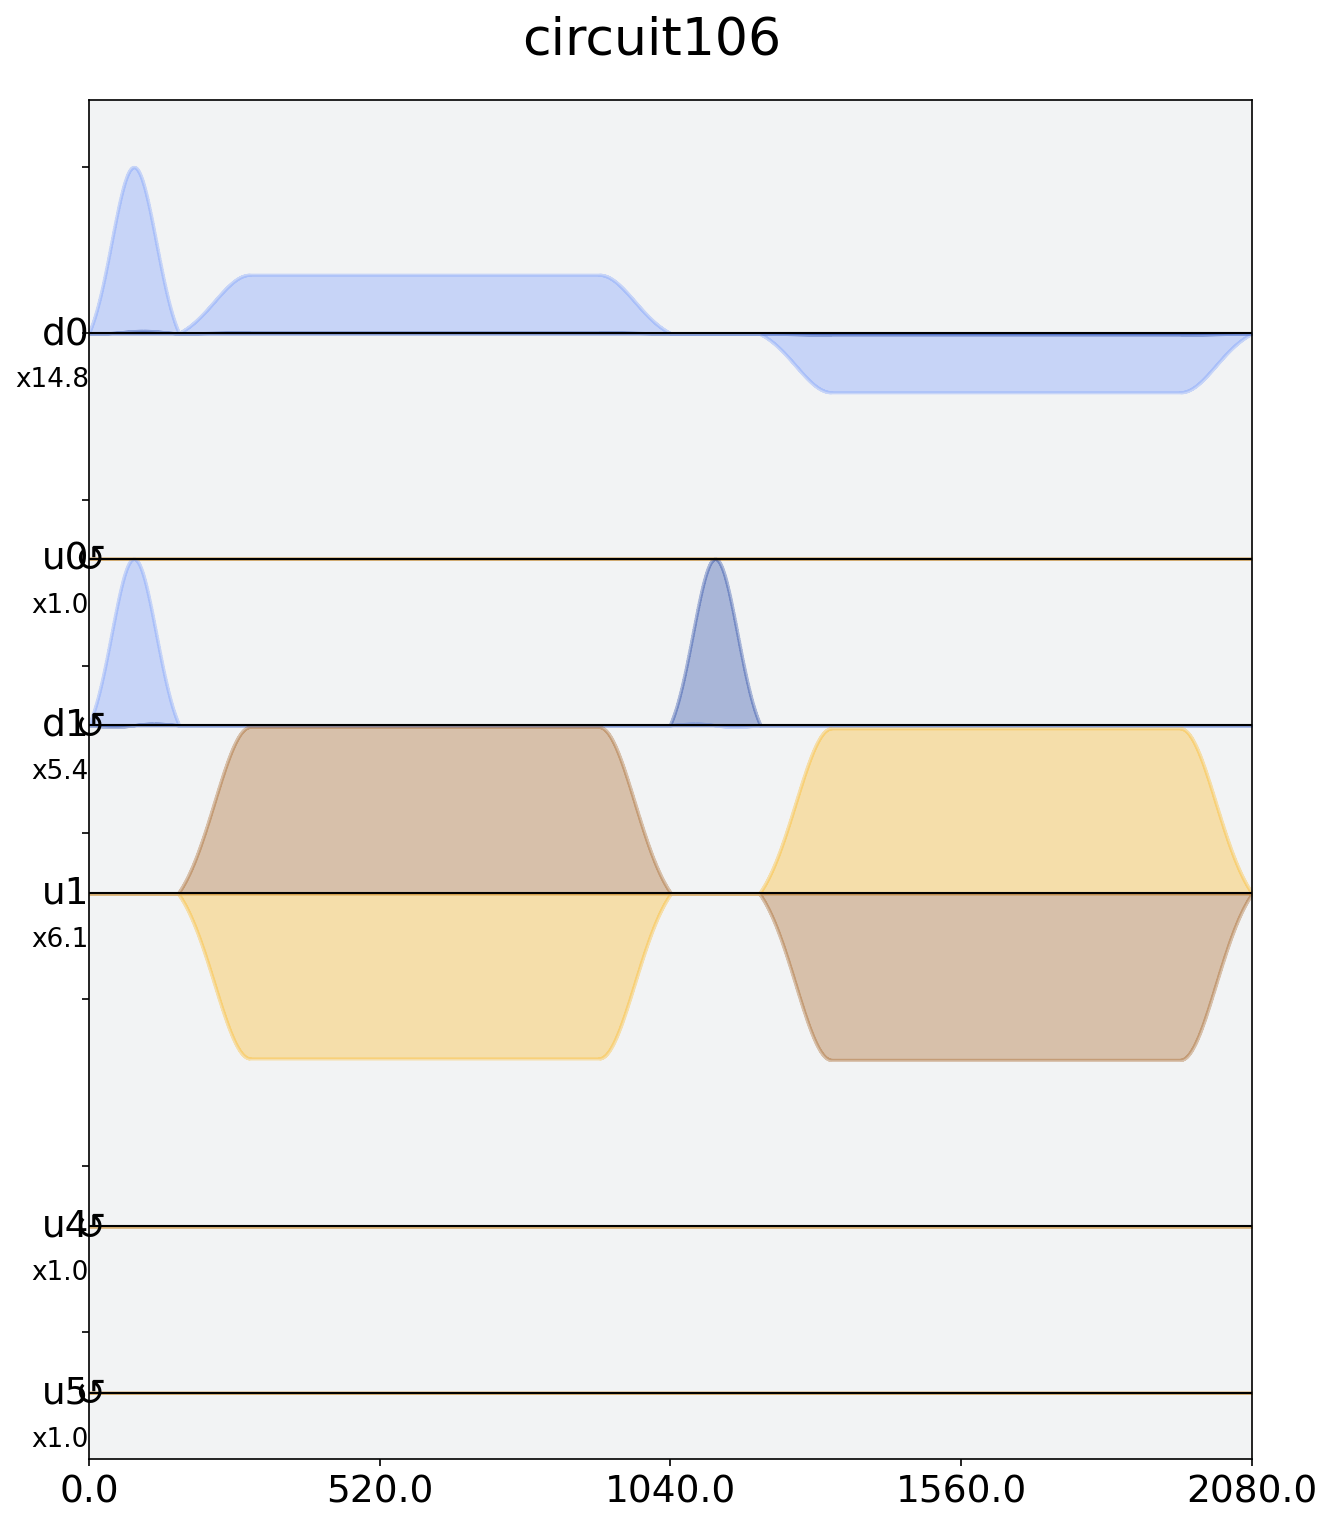

In [28]:
circ_device = transpile(circ, machine)
sched_circ = schedule(circ_device, machine)
sched_circ.draw()

In [29]:
sched_circ

Schedule((0, ShiftPhase(1.5707963267948966, DriveChannel(1))), (0, ShiftPhase(1.5707963267948966, ControlChannel(0))), (0, ShiftPhase(1.5707963267948966, ControlChannel(4))), (0, ShiftPhase(1.5707963267948966, ControlChannel(5))), (0, Play(Drag(duration=160, amp=(0.06778309230639473+0.000957550463125842j), sigma=40, beta=-0.33728879504027004), DriveChannel(0))), (0, Play(Drag(duration=160, amp=(-3.4183723042042244e-17-0.18608752099431056j), sigma=40, beta=-0.716798411217601), DriveChannel(1))), (160, Play(GaussianSquare(duration=880, amp=(0.02393050034476665+0.0005002795078974329j), sigma=64, width=624), DriveChannel(0))), (160, Play(GaussianSquare(duration=880, amp=(-0.16221396950925582+0.16360358169206665j), sigma=64, width=624), ControlChannel(1))), (1040, Play(Drag(duration=160, amp=(0.18608752099431056+0j), sigma=40, beta=-0.716798411217601), DriveChannel(1))), (1200, Play(GaussianSquare(duration=880, amp=(-0.02393050034476665-0.00050027950789743j), sigma=64, width=624), DriveChan

In [30]:
sched_circ.instructions[1]

(0, ShiftPhase(1.5707963267948966, ControlChannel(0)))

In [31]:
instrucs = sched_circ.instructions

In [32]:
new_sched = qiskit.pulse.Schedule(name = "Schedule stretched")

In [33]:
for instruc_paren in instrucs:
        instruc = instruc_paren[1]
        print(instruc)

ShiftPhase(1.5707963267948966, DriveChannel(1))
ShiftPhase(1.5707963267948966, ControlChannel(0))
ShiftPhase(1.5707963267948966, ControlChannel(4))
ShiftPhase(1.5707963267948966, ControlChannel(5))
Play(Drag(duration=160, amp=(0.06778309230639473+0.000957550463125842j), sigma=40, beta=-0.33728879504027004), DriveChannel(0))
Play(Drag(duration=160, amp=(-3.4183723042042244e-17-0.18608752099431056j), sigma=40, beta=-0.716798411217601), DriveChannel(1))
Play(GaussianSquare(duration=880, amp=(0.02393050034476665+0.0005002795078974329j), sigma=64, width=624), DriveChannel(0))
Play(GaussianSquare(duration=880, amp=(-0.16221396950925582+0.16360358169206665j), sigma=64, width=624), ControlChannel(1))
Play(Drag(duration=160, amp=(0.18608752099431056+0j), sigma=40, beta=-0.716798411217601), DriveChannel(1))
Play(GaussianSquare(duration=880, amp=(-0.02393050034476665-0.00050027950789743j), sigma=64, width=624), DriveChannel(0))
Play(GaussianSquare(duration=880, amp=(0.1622139695092558-0.163603581

In [34]:
from qiskit import pulse
def stretchSchedule_singleQ(sched, factor, machine):
    # args:circuit in pulse form WITHOUT measurement, stretch factor
    #output: pulses stretched by thefactor
    
    instrucs = sched.instructions
    new_sched = qiskit.pulse.Schedule(name = "Schedule stretched by factor " + str(factor))
    
    #Only stretching the sample pulse, doing nothing to shiftphase, measurement,etc.
    j = len(instrucs)
    while (i<j):
        instruc_paren = instrucs[i]
        i+=1
        instruc = instruc_paren[1]
        #if drag/gaussian square ....ignore gaussian, only add drag
        if (isinstance(instruc, Play)):
            
            #print(instruc)
            
            if (isinstance(instruc.pulse, Drag)):
                drag = instruc.pulse
                ## param = {"duration": self.duration, "amp": self.amp, "sigma": self.sigma, "width": self.width}
                param = drag.parameters
                #print("Initial Param")
                #print(param)
                #print("final Param")
                #print('Duration' + str(factor*param['duration']))

                #stretching the drag pulse
                s_pulse = Drag(int(factor*param['duration']), param['amp']/factor, factor*param['sigma'] ,param['beta'] )
                channel = instruc.channels[0]
                new_sched = new_sched.append(pulse.Play(s_pulse, channel))
                
            if (isinstance(instruc.pulse, GaussianSquare)):
                
                gauss = instruc.pulse
                ## param = {"duration": self.duration, "amp": self.amp, "sigma": self.sigma, "width": self.width}
                param = gauss.parameters
                print('Gaussian Parameters------------------------')
                print(param)

                #stretching the drag pulse
                s_pulse = GaussianSquare(int(factor*param['duration']), param['amp']/factor, factor*param['sigma'],factor*param['width'])
                channel = instruc.channels[0]
                new_sched = new_sched.append(pulse.Play(s_pulse, channel))
        
        #if not acquire    
        elif ( not isinstance(instruc, Acquire)):
            new_sched+= instruc
    return new_sched

In [35]:
scheddy = stretchSchedule_singleQ(sched_circ, 3, machine)

UnboundLocalError: local variable 'i' referenced before assignment

In [36]:
scheddy.draw()

NameError: name 'scheddy' is not defined

In [37]:
scheddy

NameError: name 'scheddy' is not defined

In [38]:
scheddy.duration

NameError: name 'scheddy' is not defined

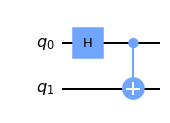

In [39]:
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)
circ.draw(output = 'mpl')

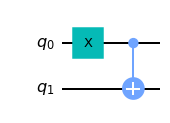

In [40]:
circ2 = QuantumCircuit(2)
circ2.x(0)
circ2.cx(0,1)
circ2.draw(output = 'mpl')

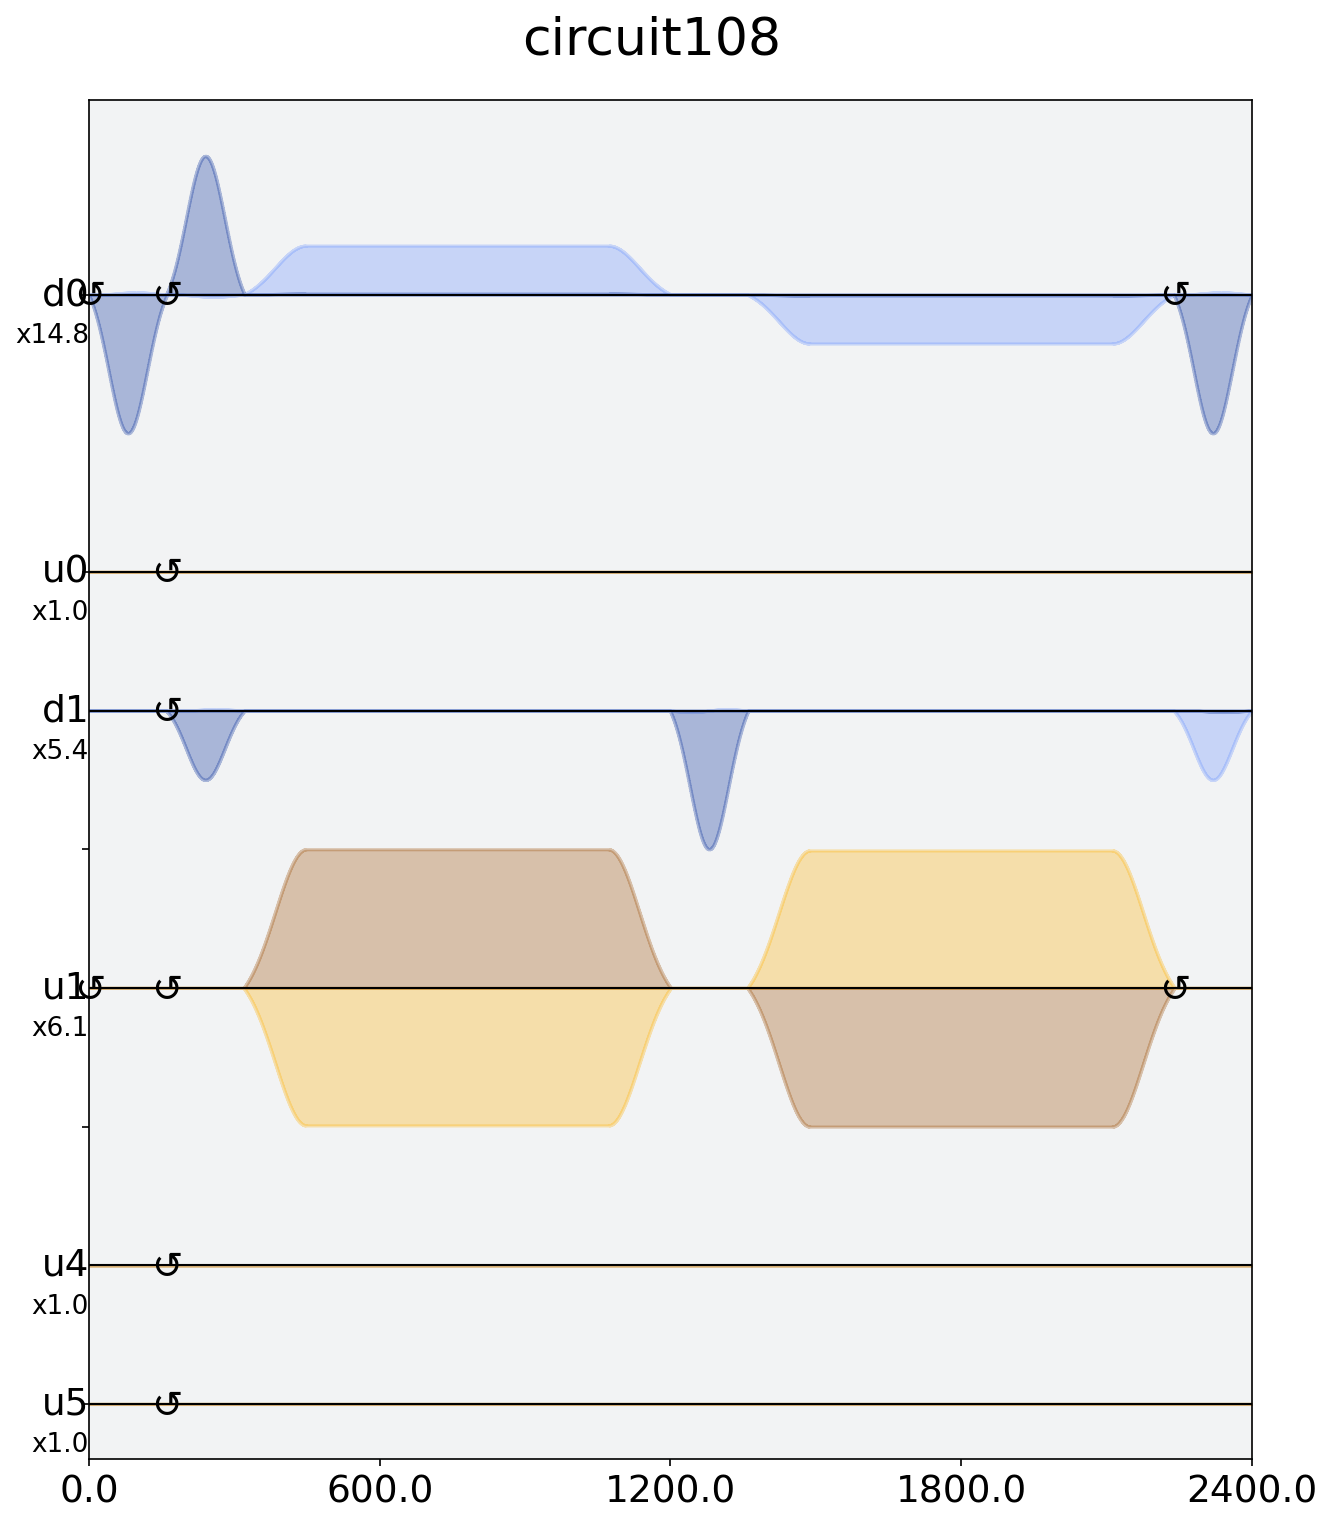

In [41]:
circ_device = transpile(circ, machine)
sched_circ = schedule(circ_device, machine)
sched_circ.draw()

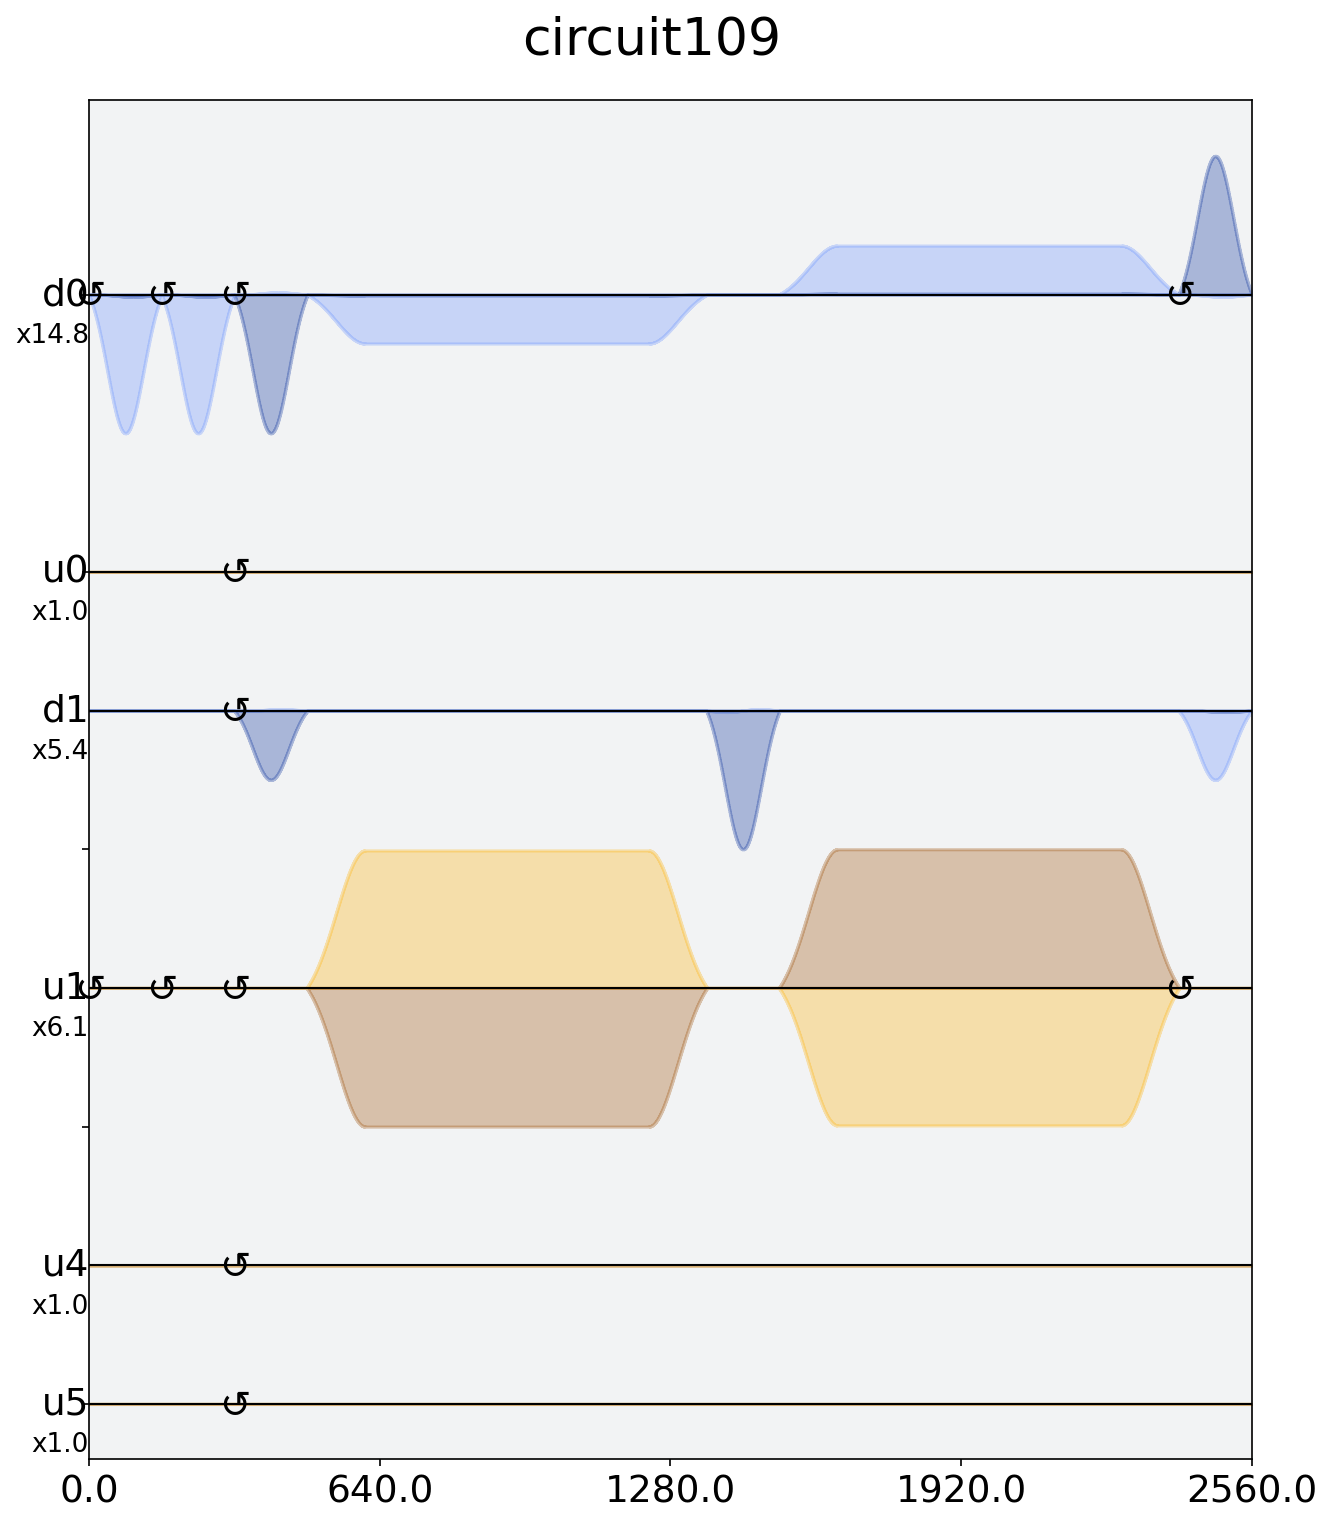

In [42]:
circ_device2 = transpile(circ2, machine)
sched_circ2 = schedule(circ_device2, machine)
sched_circ2.draw()

In [43]:
sched_circ3 = sched_circ.insert(sched_circ.duration, sched_circ2)

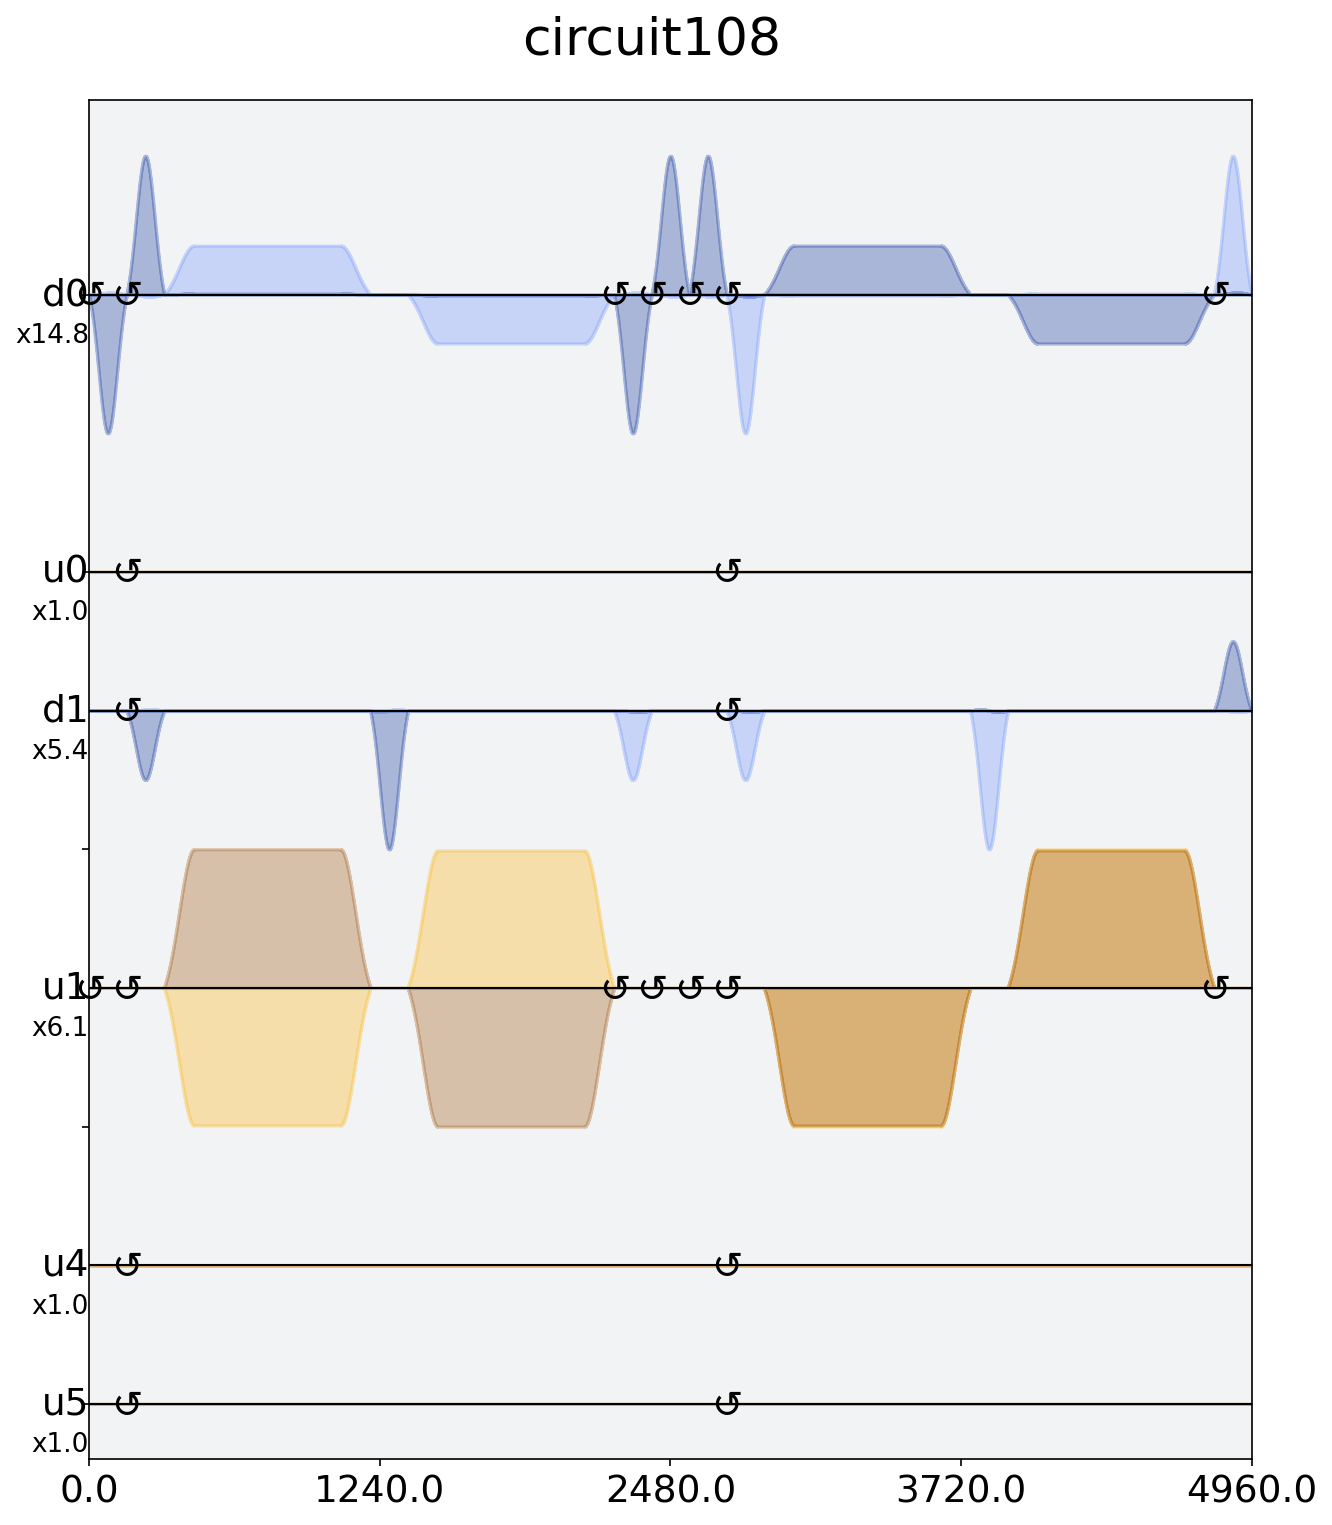

In [44]:
sched_circ3.draw()

In [45]:

def instruc_sorter(instrucs):
    '''
    Input: Array of instructions
    Output: Groups all same-time instrucs into smaller arrays and returns a big array containing those 
    smaller sub arrays (lol array lingo)
    
    
    Structure of instruc:
            (duration, pulse_instruction)
    '''
    big_array = []    #where all instruc arrays will be stored
    num_instrucs = len(instrucs)
    i = 0 # indexing instrucs
    while (i < num_instrucs):

        instruc = instrucs[i]
        time = instruc[0]
        array = []
        #adding in the instruction
        array.append(instruc[1])
        #appending index
        i+=1


        while(i<num_instrucs):
            instruc2 = instrucs[i]
            time2 = instruc2[0]
            if (time == time2):
                array.append(instruc2[1])
                i+=1
            else:
                break
        big_array.append(array)
    return big_array


In [46]:
i = instruc_sorter(sched_circ.instructions)

In [47]:
i[4]

[Play(GaussianSquare(duration=880, amp=(-0.02393050034476665-0.00050027950789743j), sigma=64, width=624), DriveChannel(0)),
 Play(GaussianSquare(duration=880, amp=(0.1622139695092558-0.16360358169206668j), sigma=64, width=624), ControlChannel(1))]

In [48]:
def stretch_sub_sched(sim_pulse_array, factor):
    '''
    Input: A set of pulses happening at the same time (sim = simultaneous) and factor to be stretched by
    Output: A schedule consisting of the stretched pulses
    
    '''
    sub_sched = qiskit.pulse.Schedule()
    for instruc in sim_pulse_array:

        #anything except shift phase
        if (isinstance(instruc, Play)):

            if (isinstance(instruc.pulse, Drag)):
                drag = instruc.pulse
                ## param = {"duration": self.duration, "amp": self.amp, "sigma": self.sigma, "width": self.width}
                param = drag.parameters
                #stretching the drag pulse
                s_pulse = Drag(int(factor*param['duration']), param['amp']/factor, factor*param['sigma'] ,param['beta'] )
                channel = instruc.channels[0]
                sub_sched = sub_sched.append(pulse.Play(s_pulse, channel))

            elif (isinstance(instruc.pulse, GaussianSquare)):

                gauss = instruc.pulse
                ## param = {"duration": self.duration, "amp": self.amp, "sigma": self.sigma, "width": self.width}
                param = gauss.parameters
                #stretching the drag pulse
                s_pulse = GaussianSquare(int(factor*param['duration']), param['amp']/factor, factor*param['sigma'],factor*param['width'])
                channel = instruc.channels[0]
                sub_sched = sub_sched.append(pulse.Play(s_pulse, channel))

            #if not acquire    
            elif ( not isinstance(instruc, Acquire)):
                sub_sched+= instruc
        else:
            sub_sched+= instruc
    return sub_sched

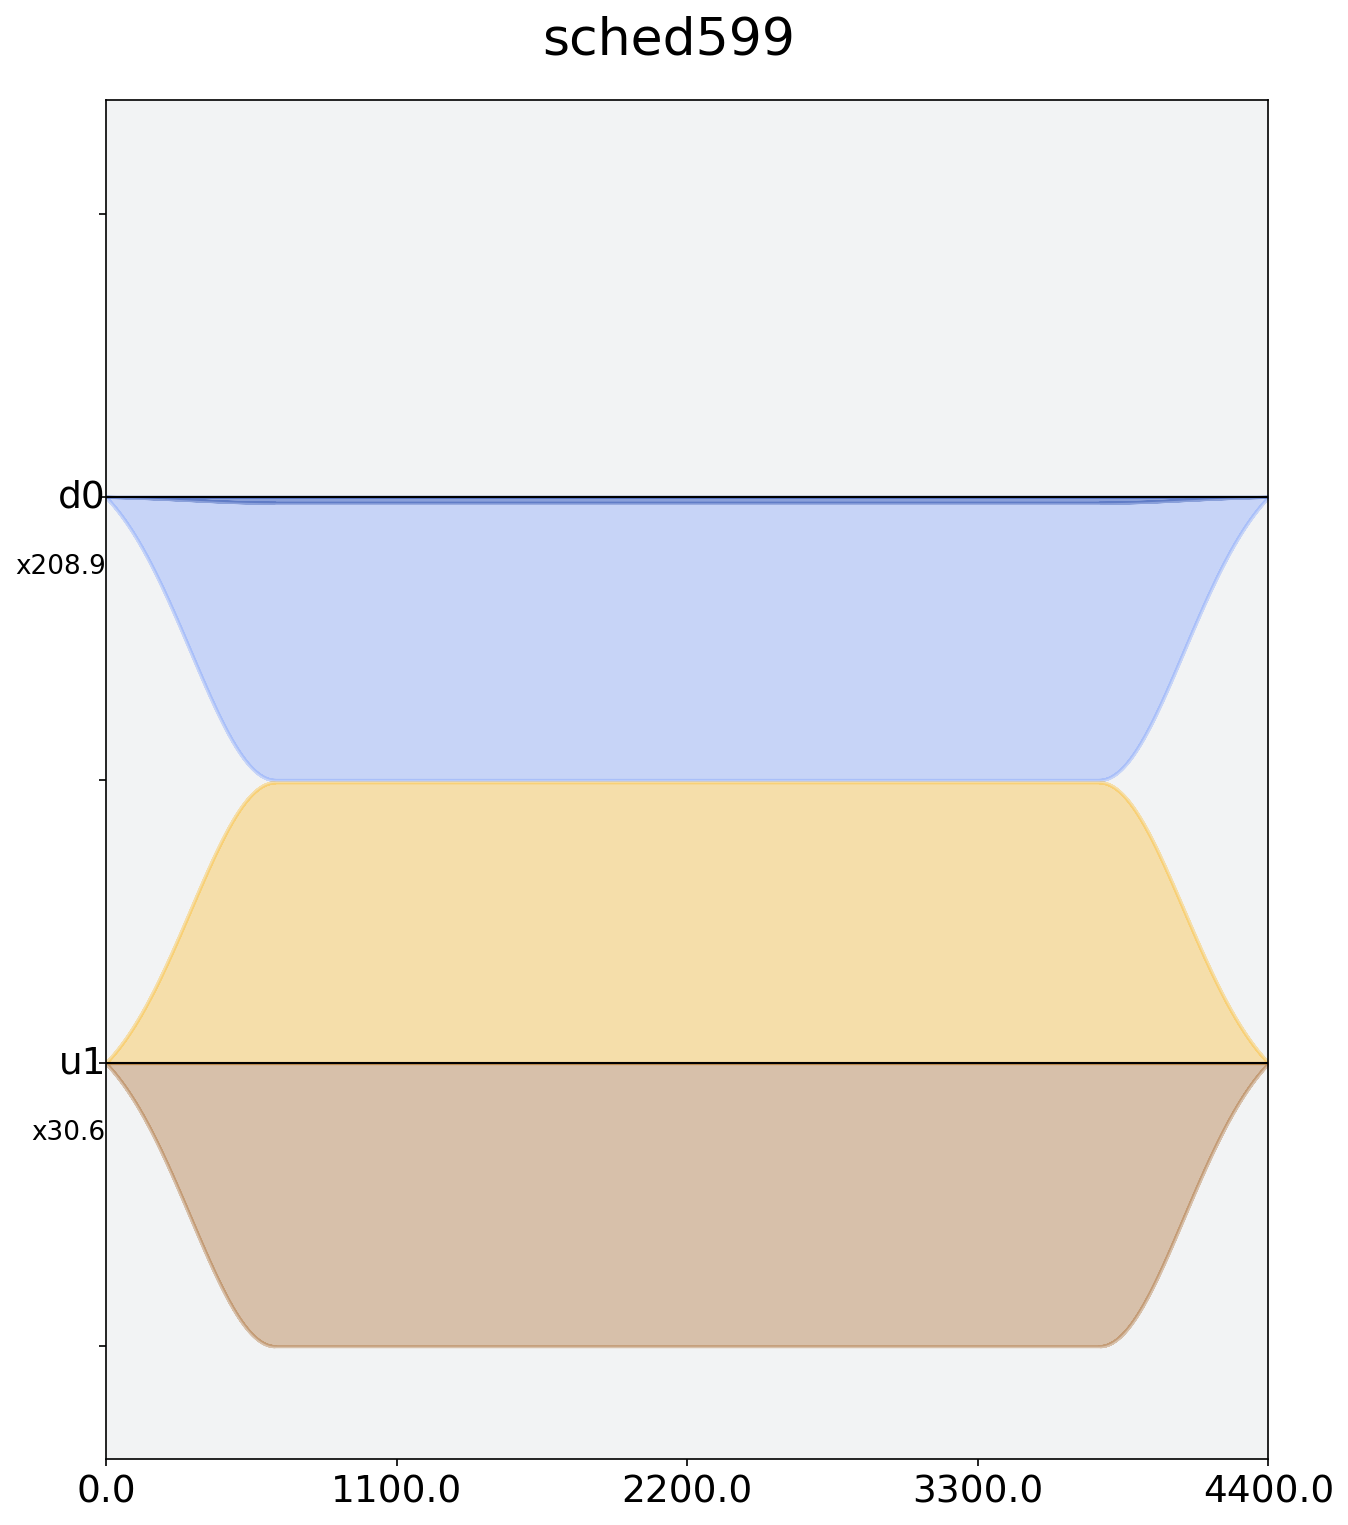

In [49]:
sched = stretch_sub_sched(i[4], factor = 5)
sched.draw()

In [54]:
def stretcher(circ, machine, factor):
    '''
    Input: A circ (without measurement) which is to be converted to a schedule, machine to be 
    transpiled upon, and the factor to be stretched by
    Output: The stretched schedule with measurement
    '''
    num_qubits = circ.num_qubits
    circ_device = transpile(circ, machine)
    sched = schedule(circ_device, machine)
    instrucs = sched.instructions
    
    big_array = instruc_sorter(instrucs)
    stretch_sched = None
    j = 0
    
    for element in big_array: 
        sub_sched = stretch_sub_sched(element, factor)
        
        #first element
        if (j == 0):
            stretch_sched = sub_sched
            #print(stretch_sched.instructions)
            j = 1
        else:
            stretch_sched = stretch_sched.insert(stretch_sched.duration, sub_sched)
            
    #adding measurement
    qubits = [i for i in range(num_qubits)]
    stretch_sched +=measure(qubits, machine) <<stretch_sched.duration   #([0], backend)
    
    return stretch_sched

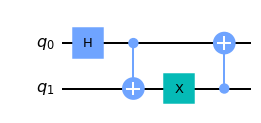

In [55]:
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)
circ.x(1)
circ.cx(1, 0)
circ.draw(output = 'mpl')

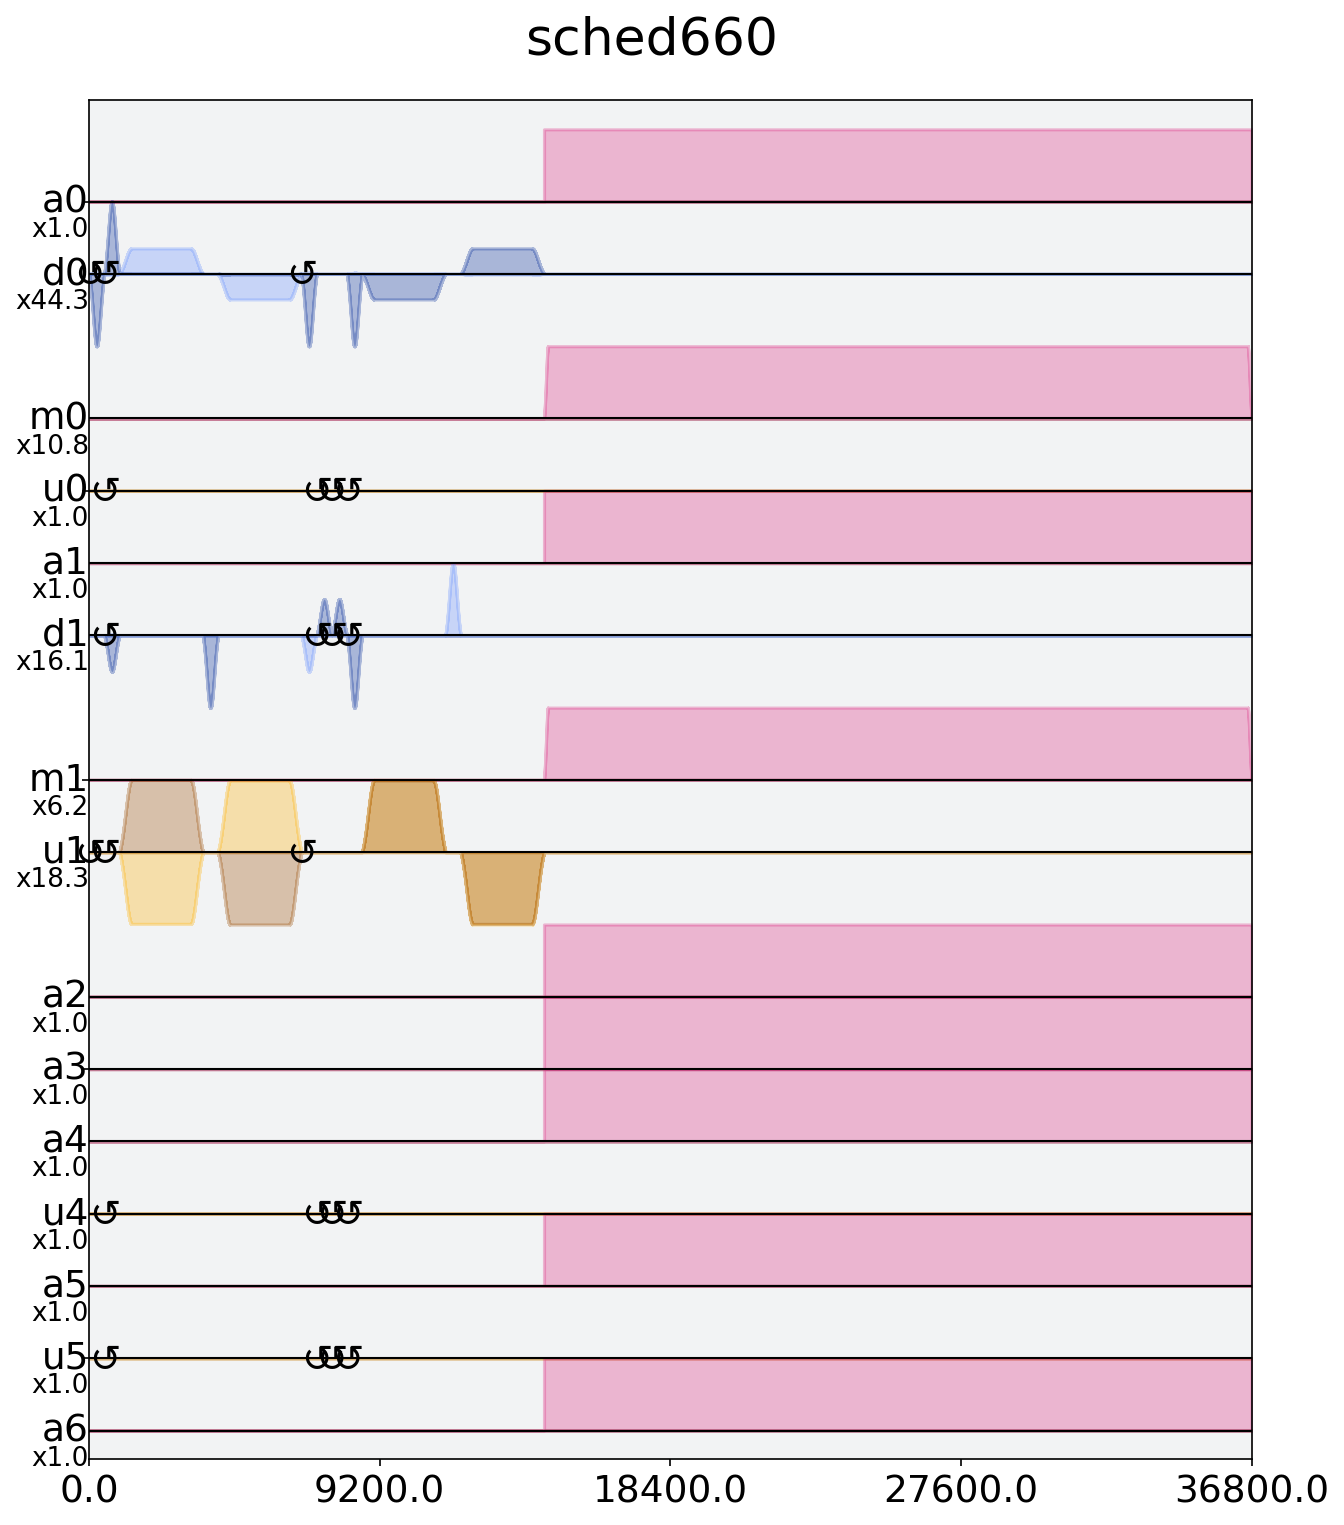

In [56]:
sched = stretcher(circ, factor = 3, machine = machine)
sched.draw()

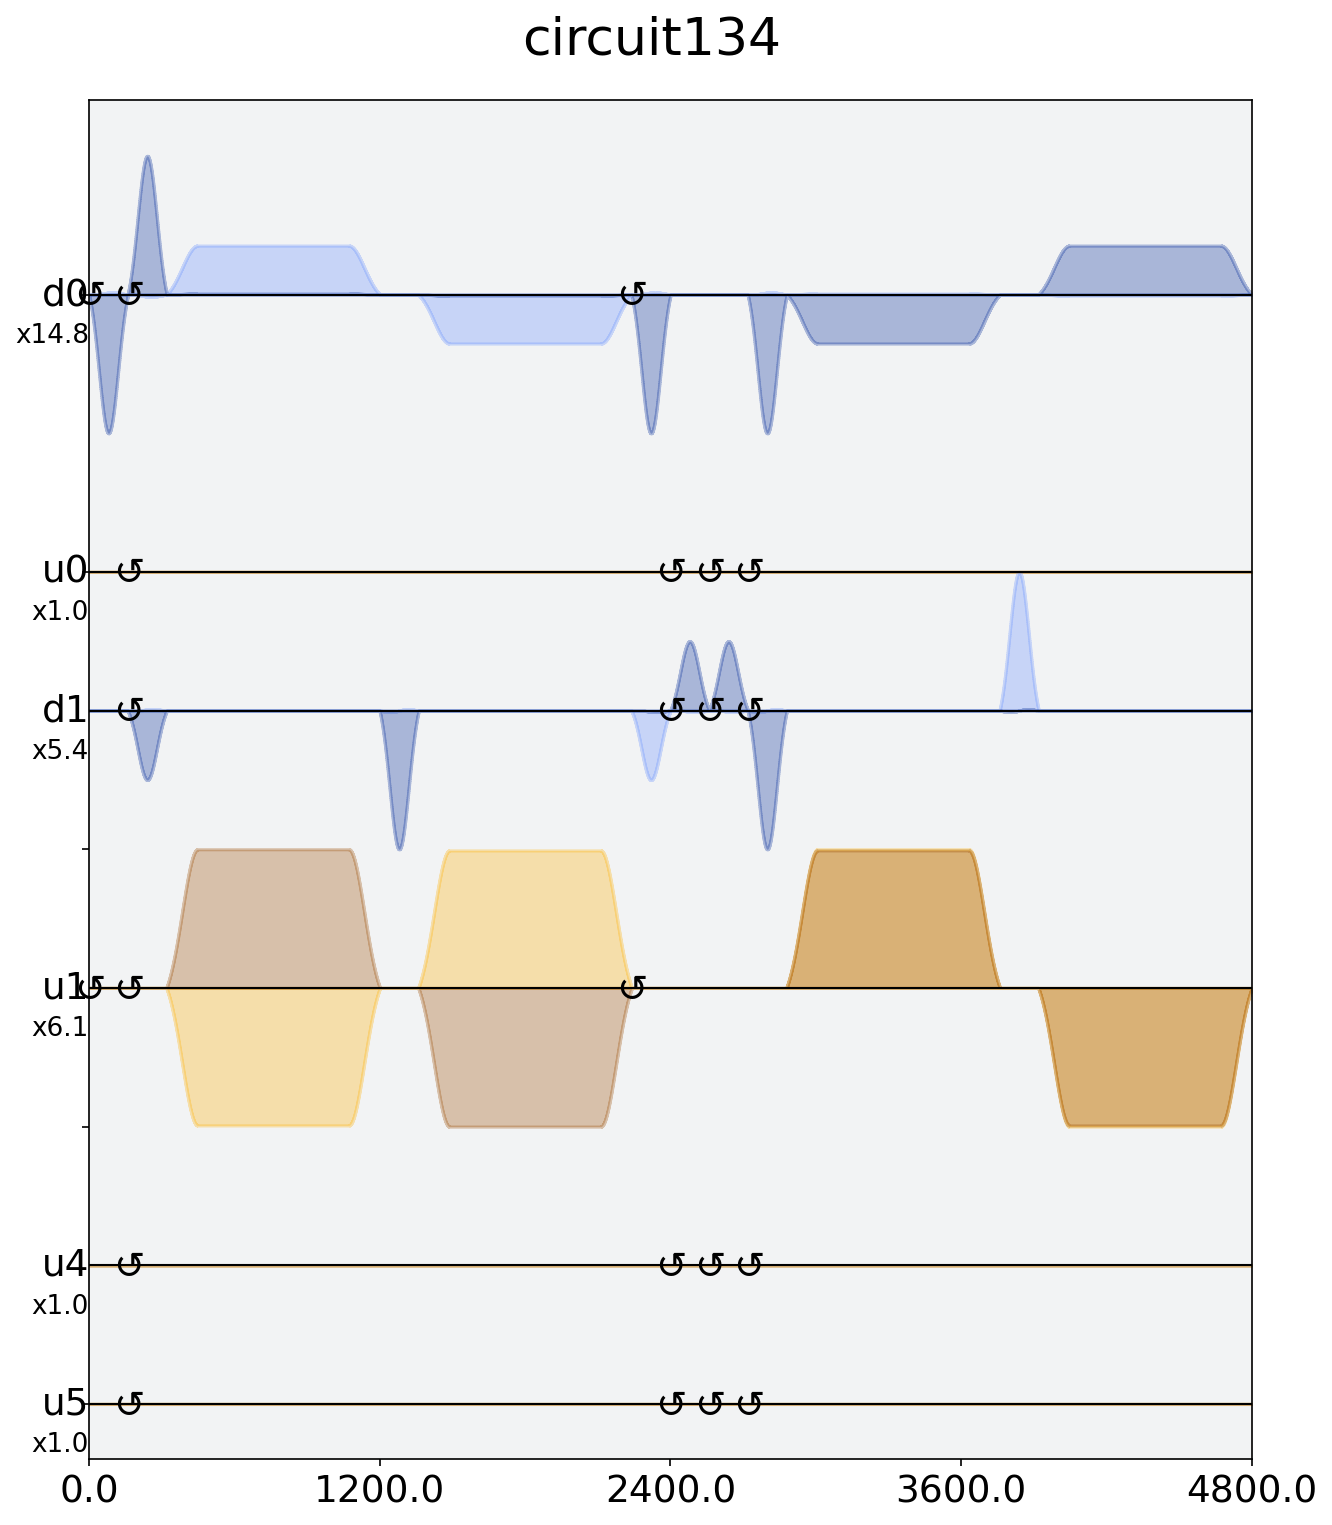

In [57]:
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)
circ.x(1)
circ.cx(1, 0)
circ_device = transpile(circ, machine)
sched_circ = schedule(circ_device, machine)
sched_circ.draw()